In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
from functools import partial
from typing import Literal

import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

In [2]:
dumperInput = DumperInputManager([
    "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/",
    #"/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v11/"
    ], 
                                limitFileCount=None, restrictToAvailableDumperTypes=[DumperType.TICL, DumperType.TICLsupercls]
                                )

In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_206.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_206.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_215.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_215.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_217.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_217.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_203.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_203.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/al

In [4]:
res = runComputations([CPToSuperclusterProperties, CPtoTrackster_properties], dumperInput, max_workers=10)
CPtoSC_df = res[0]
CPtoTs_df = res[1]

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
CPtoSC_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             0                        522       405.115936   
              1                       1422       387.418945   
1             0                        709        17.691242   
              1                       2044         3.600289   
2             0                          1         4.563722   
...                                    ...              ...   
1997          1                       1848       122.618843   
1998          0                          2       331.204498   
              1                       2449       329.913849   
1999          0                        796       363.633545   
              1                       2320       361.074768   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             0                        405.000031             424.642670   
              1                        387.418945             408.701782   
1             0                         17.691242              22.673588   
              1                          3.600289               6.918837   
2             0                          4.563722               7.374171   
...                                           ...                    ...   
1997          1                        122.618843             131.295837   
1998          0                        330.576233             351.034424   
              1                        329.913849             348.796631   
1999          0                        361.069580             384.174652   
              1                        361.074768             380.784607   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             0                  88.835060            -2.172946   
              1                  88.365974             2.172561   
1             0                   5.060681            -2.390920   
              1                   0.443104             2.448714   
2             0                   1.454985            -1.836019   
...                                    ...                  ...   
1997          1                  22.188763             2.412977   
1998          0                  61.767036            -2.342935   
              1                  61.166588             2.342796   
1999          0                  50.758205            -2.728853   
              1                  45.851013             2.729829   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             0                             405.115936   
              1                             387.418945   
1             0                              17.691242   
              1                               3.600289   
2             0                               9.528313   
...                                                ...   
1997          1                             122.618843   
1998          0                             334.465729   
              1                             329.913849   
1999          0                             363.633545   
              1                             361.074768   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             0                                405.000031   
              1                                387.418945   
1             0                                 17.691242   
              1                                  3.600289   
2             0                                  9.528313   
...                                                   ...   
1997          1                                122.618843   
1998          0                               

In [6]:
CPtoTs_df

ts_id     score     sharedE  raw_energy  \
eventInternal caloparticle_id                                            
0             0                  522  0.000919  400.507660  405.115936   
              1                 1424  0.000793  381.119446  387.418945   
1             0                  708  0.110720    9.609651   17.691242   
              1                 2046  0.872241    1.128615    3.600289   
2             0                  343  0.649173    3.829542    4.563722   
...                              ...       ...         ...         ...   
1997          1                 1850  0.037396  106.982918  122.618843   
1998          0                  603  0.014895  302.226074  331.204498   
              1                 2454  0.008174  314.659058  329.913849   
1999          0                  795  0.016356  318.120575  363.633545   
              1                 2323  0.012016  324.588898  361.074768   

                               raw_em_energy  regressed_energy     raw_pt  \
eventInternal caloparticle_id                                               
0             0                   405.000031        424.642670  88.835060   
              1                   387.418945        408.701782  88.365974   
1             0                    17.691242         22.673588   5.060681   
              1                     3.600289          6.918837   0.443104   
2             0                     4.563722          7.374171   1.454985   
...                                      ...               ...        ...   
1997          1                   122.618843        131.295837  22.188763   
1998          0                   330.576233        351.034424  61.767036   
              1                   329.913849        348.796631  61.166588   
1999          0                   361.069580        384.174652  50.758205   
              1                   361.074768        380.784607  45.851013   

                               raw_em_pt  barycenter_eta  regressed_energy_CP  \
eventInternal caloparticle_id                                                   
0             0                88.809639       -2.172946           429.435516   
              1                88.365974        2.172561           429.435516   
1             0                 5.060681       -2.390920            12.959656   
              1                 0.443104        2.448714            12.959656   
2             0                 1.454985       -1.836019            14.302616   
...                                  ...             ...                  ...   
1997          1                22.188763        2.412977           143.381760   
1998          0                61.649872       -2.342935           372.007172   
              1                61.166588        2.342796           372.007172   
1999          0                50.400314       -2.728853           385.091278   
              1                45.851013        2.729829           385.091278   

                               raw_energy_CP  barycenter_x  barycenter_y  \
eventInternal caloparticle_id                                              
0             0                   427.619263    -40.970135     66.819366   
              1                   411.453857     39.639481    -65.881027   
1             0                    12.828395     -0.620787     60.847805   
              1                    11.095285    -11.576546    -53.067898   
2             0                    13.458269     13.558002    106.053444   
...                                      ...           ...           ...   
1997          1                   136.076126     59.997242     -1.764830   
1998          0                   372.131989     14.727599     62.869297   
              1                   376.812042    -15.320741    -63.466434   
1999          0                   378.180084    -17.431673    -40.587296   
              1                   382.831116     17.692480     40.238773   

                       

In [7]:
#store = pd.HDFStore("/workspaces/repo/scratch/analyzer-test/store.hdf", mode="r")
#store = pd.HDFStore("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/store-v1/store.hdf", mode="r")

#df = store["CPToSupercluster"]
#df

In [8]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))
histedges_equalN(CPtoTs_df.raw_pt, 8)

array([  0.44310403,   9.87179852,  20.20552635,  32.33629227,
        44.49270248,  56.61590576,  67.5207901 ,  79.44146729,
       105.48414612])

In [9]:
h_scOverCP_energy = make_scOrTsOverCP_energy_histogram(name="scOverCP_energy", label="Supercluster energy / CaloParticle energy")
fill_scOverCP_energy_histogram(h_scOverCP_energy, CPtoSC_df)
h_scOverCP_energy

Hist(
  Regular(100, 0, 2, name='e_ratio', label='Supercluster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 3997.0 (4000.0 with flow)

In [10]:
h_seedOverCP_energy = make_scOrTsOverCP_energy_histogram(name="seedOverCP_enegergy", label="Seed trackster energy / CaloParticle energy")
fill_seedTsOverCP_energy_histogram(h_seedOverCP_energy, CPtoTs_df)
h_seedOverCP_energy

Hist(
  Regular(100, 0, 2, name='e_ratio', label='Seed trackster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 3997.0 (4000.0 with flow)

In [11]:
scOverCP_fit = fitMultiHistogram(h_scOverCP_energy)
scOverCP_fit

/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)
/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in multiply
  return A* np.exp(-dx*dx/f)


[[CruijffFitResult(params=CruijffParam(A=7.80440704174372, m=0.9487166930695642, sigmaL=0.4405581105978847, sigmaR=0.08428837694629218, alphaL=-0.33391423664740116, alphaR=0.26245766095809536), covMatrix=array([[ 0.61905494, -0.00629738, -0.05612948, -0.00125274,  0.18270246,
          -0.00325157],
         [-0.00629738,  0.00275907,  0.0041215 , -0.00193163, -0.00879403,
           0.00279625],
         [-0.05612948,  0.0041215 ,  0.01492601, -0.00244802, -0.04823199,
           0.00393514],
         [-0.00125274, -0.00193163, -0.00244802,  0.00170594,  0.00463403,
          -0.00296339],
         [ 0.18270246, -0.00879403, -0.04823199,  0.00463403,  0.18502455,
          -0.00807053],
         [-0.00325157,  0.00279625,  0.00393514, -0.00296339, -0.00807053,
           0.01236556]])),
  CruijffFitResult(params=CruijffParam(A=14.314421011510918, m=1.0196822036232014, sigmaL=0.16496406996110566, sigmaR=0.03489061330217647, alphaL=0.18419267561499372, alphaR=0.17598080023881646), covMa

In [12]:
seedOverCP_fit = fitMultiHistogram(h_seedOverCP_energy)
seedOverCP_fit

[[CruijffFitResult(params=CruijffParam(A=8.130683919054501, m=0.5909022124169108, sigmaL=0.17028779711637726, sigmaR=0.33654564125105674, alphaL=-0.04715567430899898, alphaR=-0.11571460930221225), covMatrix=array([[ 0.62484262,  0.00176911, -0.01322215, -0.03374787,  0.07036338,
           0.10043511],
         [ 0.00176911,  0.00782833,  0.00850326, -0.00914409, -0.02729914,
           0.01718105],
         [-0.01322215,  0.00850326,  0.01086548, -0.00916413, -0.04064757,
           0.01632076],
         [-0.03374787, -0.00914409, -0.00916413,  0.01521621,  0.02800456,
          -0.03707126],
         [ 0.07036338, -0.02729914, -0.04064757,  0.02800456,  0.18943119,
          -0.04808052],
         [ 0.10043511,  0.01718105,  0.01632076, -0.03707126, -0.04808052,
           0.11424044]])),
  CruijffFitResult(params=CruijffParam(A=9.262491361989253, m=0.8876770129946219, sigmaL=0.25698684340629613, sigmaR=0.12482773093200157, alphaL=-0.08254147910348733, alphaR=-0.025646602703918032), 

In [13]:
def plotSingleHistWithFit(h_1d:hist.Hist, fitRes:CruijffFitResult, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
    hep.histplot([h_1d], label=["Best associated\nsupercluster", "Best associated trackster"], ax=ax, yerr=False, flow="none")
    x_plotFct = np.linspace(h_1d.axes[0].centers[0], h_1d.axes[0].centers[-1], 500)
    ax.plot(x_plotFct, cruijff(x_plotFct,*fitRes.params.makeTuple()), label=f"Cruijff fit\n$\sigma={fitRes.params.sigmaAverage:.3f}$")
    ax.set_xlim(0.5, 1.5)
    ax.set_ylabel("Events")
    ax.legend()

In [14]:
eta_axis[1]

(2.15, 2.75)

In [15]:
def plotAllFits(h:hist.Hist, fitResults:list[list[CruijffFitResult]]):
    for eta_bin in range(len(h.axes["absSeedEta"])):
        for seedPt_bin in range(len(h.axes["seedPt"])):
            h_1d = h[{"absSeedEta":eta_bin, "seedPt":seedPt_bin}]
            plotSingleHistWithFit(h_1d, fitResults[eta_bin][seedPt_bin])
            plt.text(0.05, 0.95, etaBinToText(eta_bin)+"\n"+ptBinToText(seedPt_bin), va="top", transform=plt.gca().transAxes, fontsize=20)

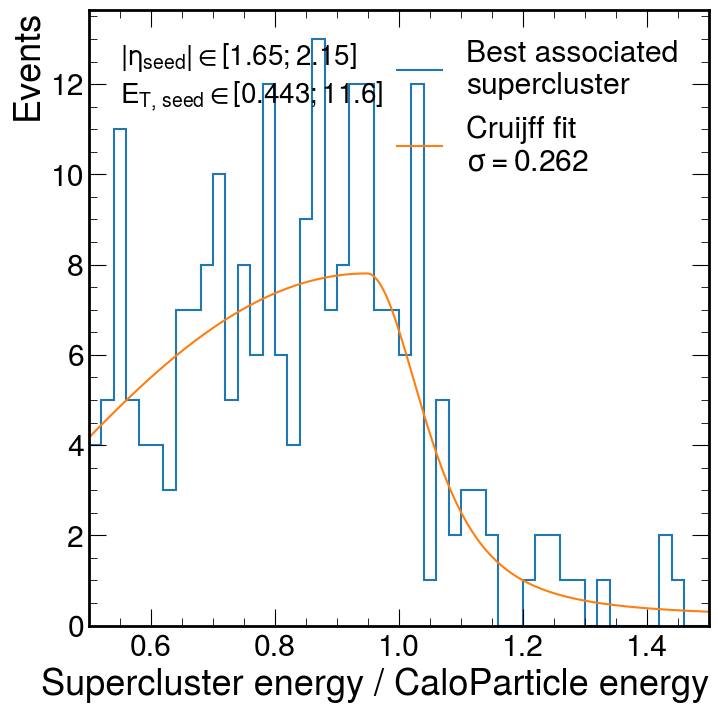

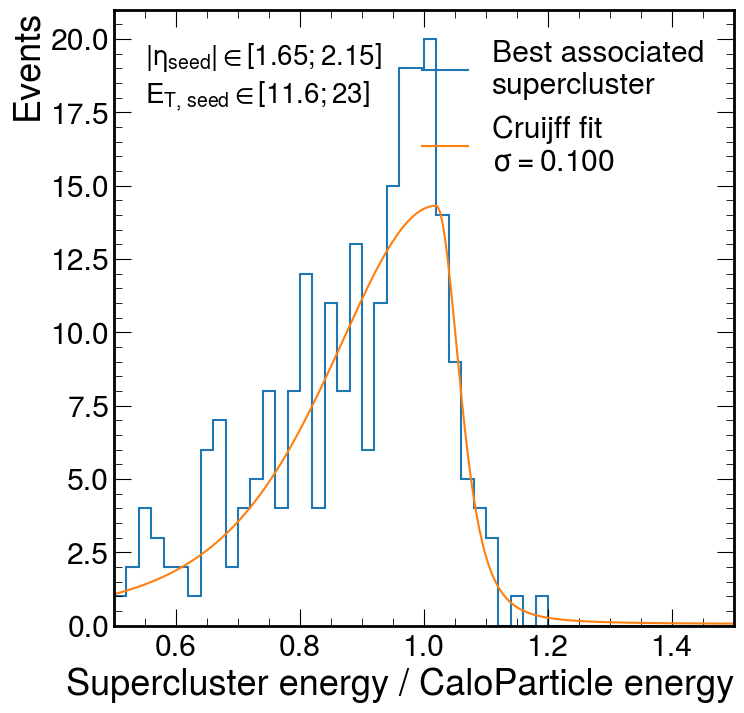

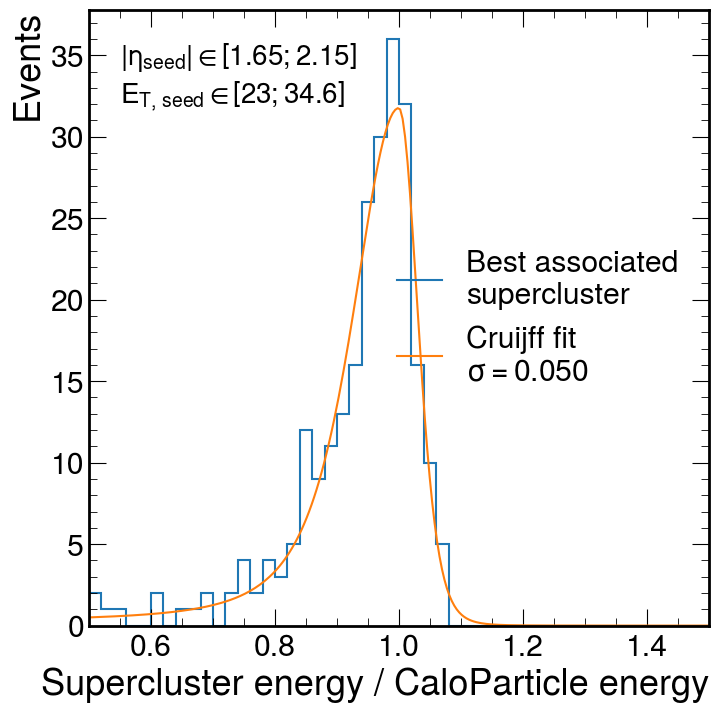

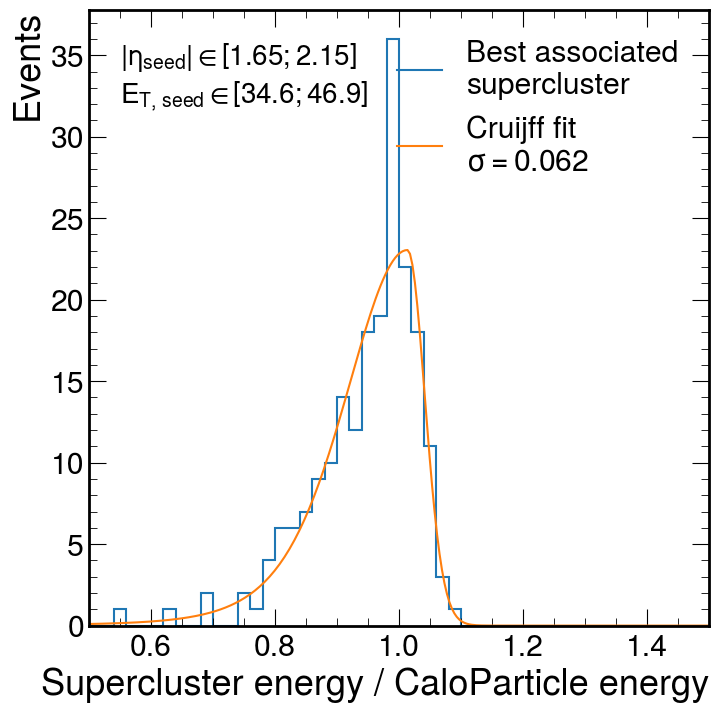

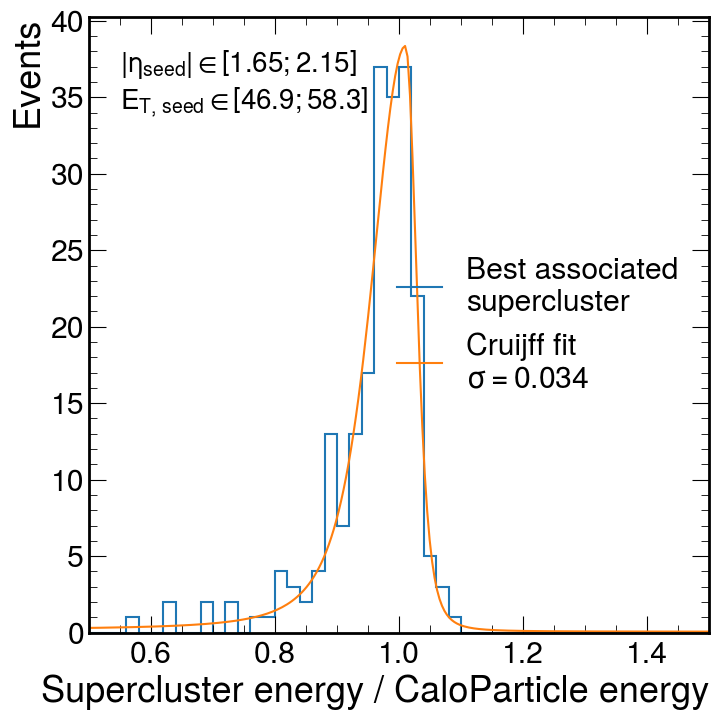

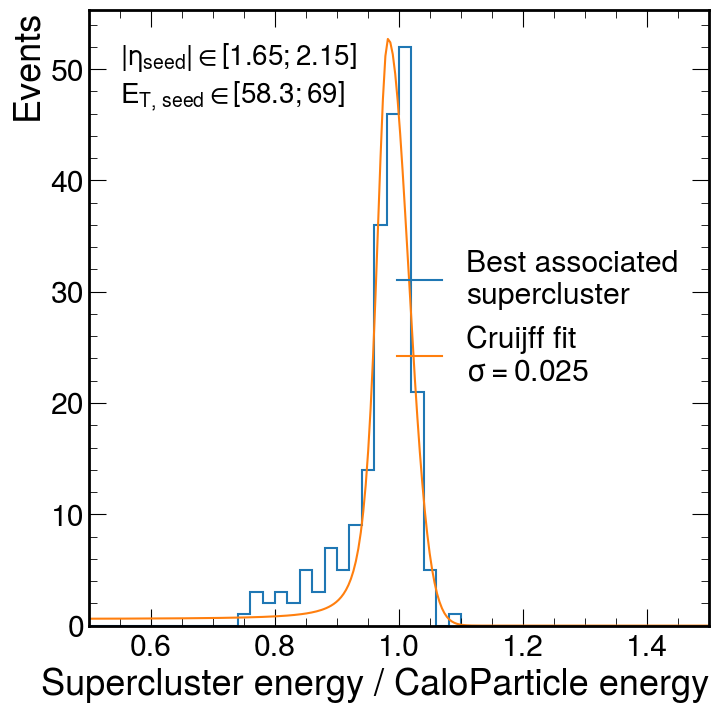

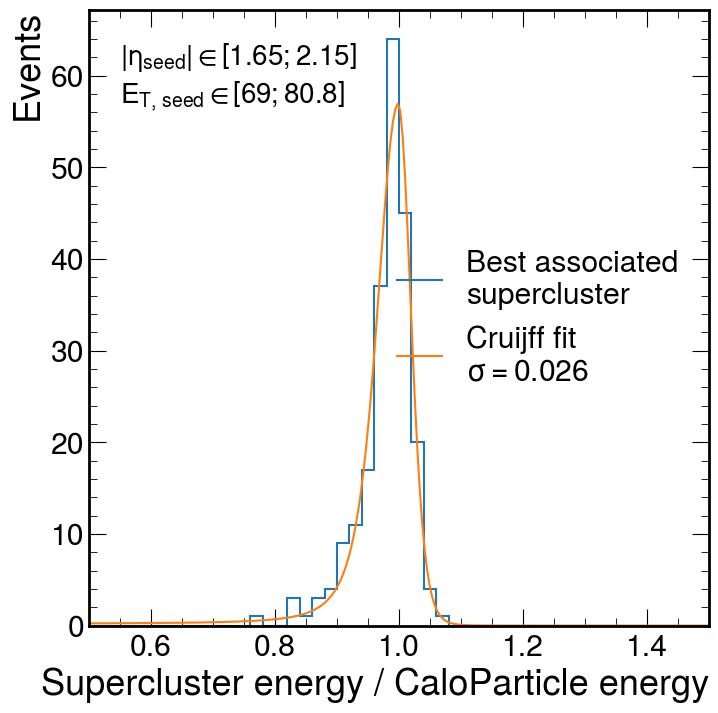

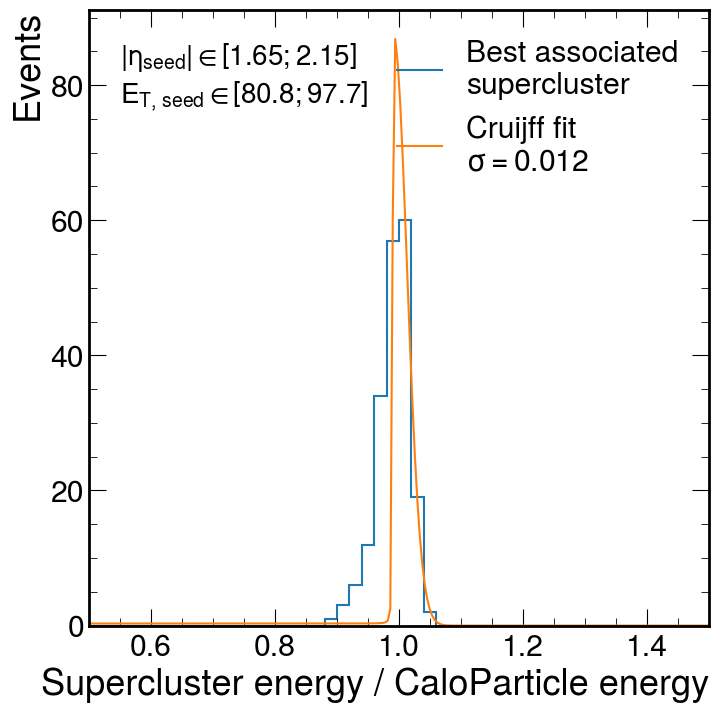

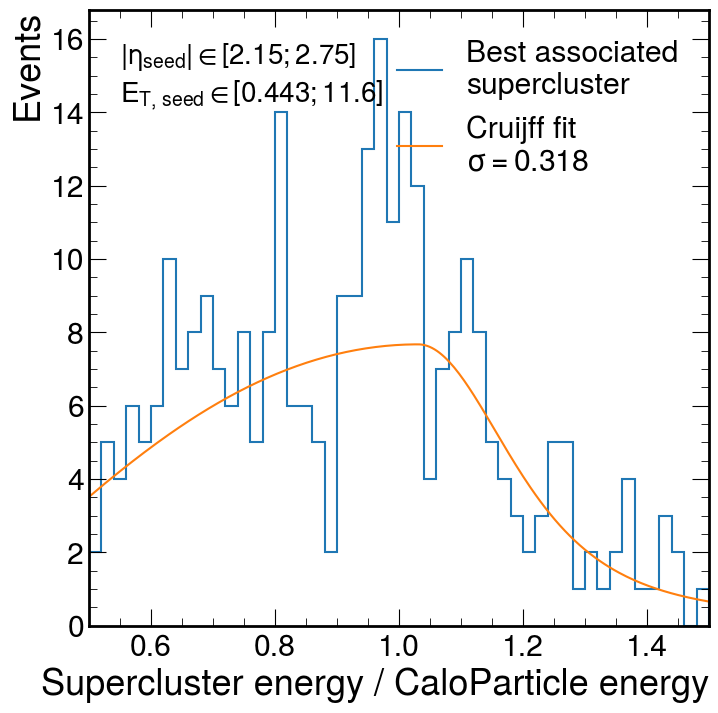

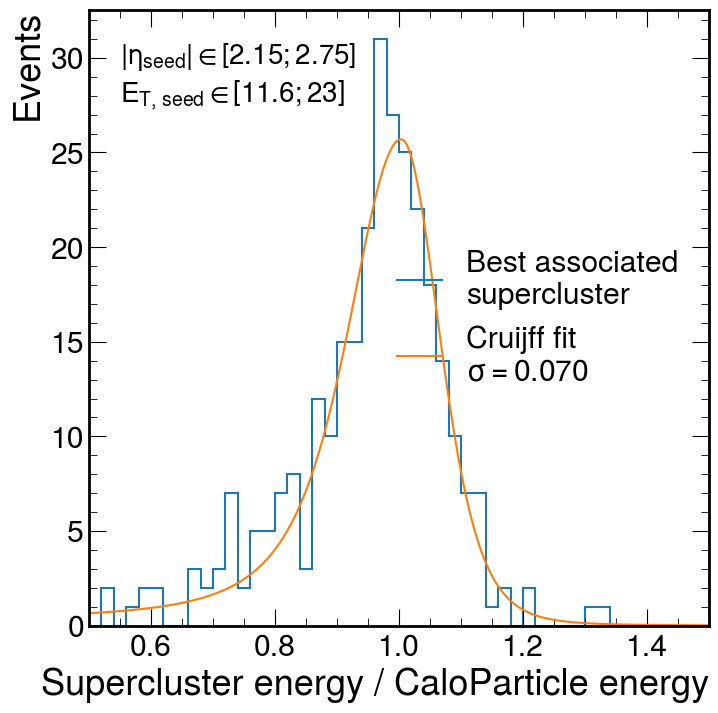

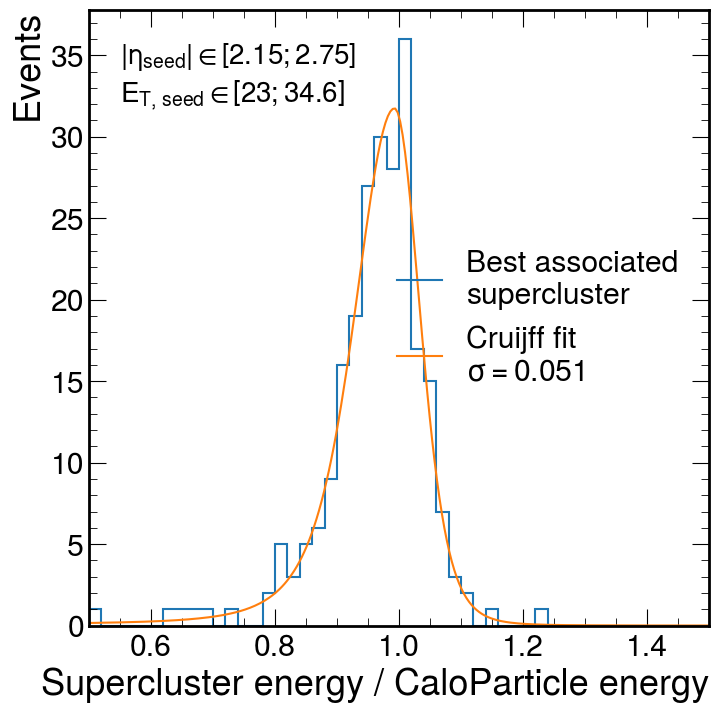

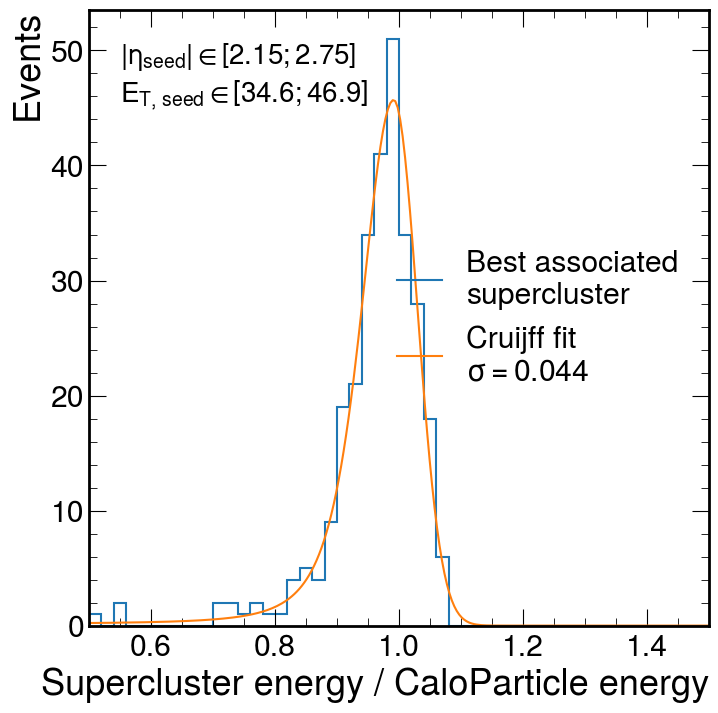

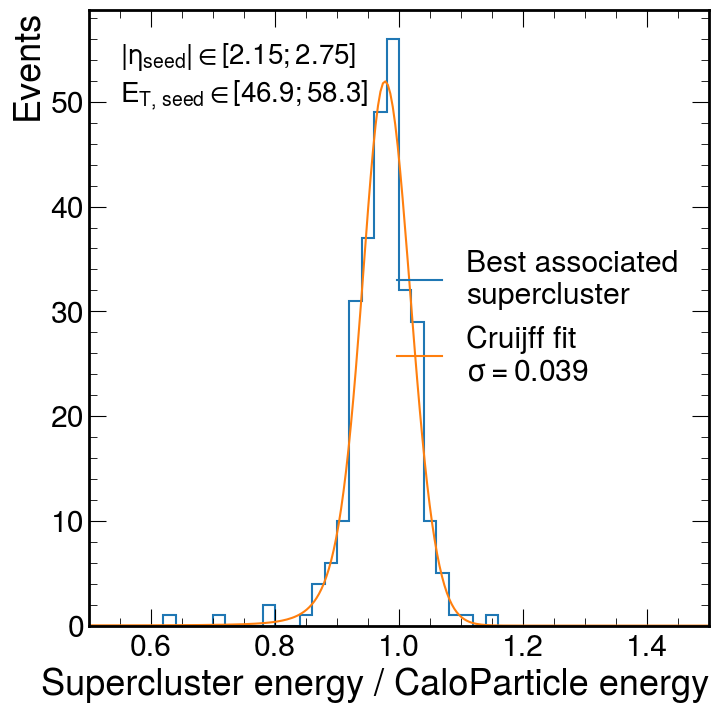

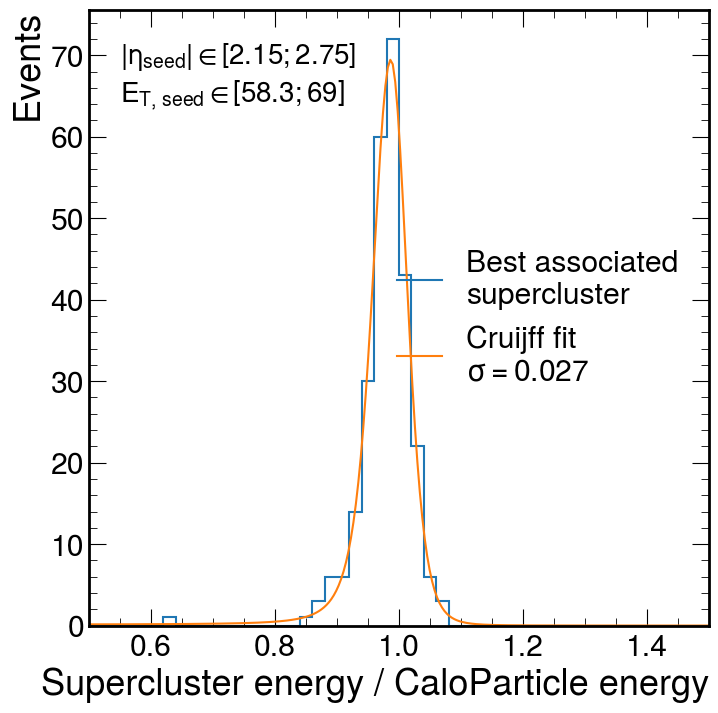

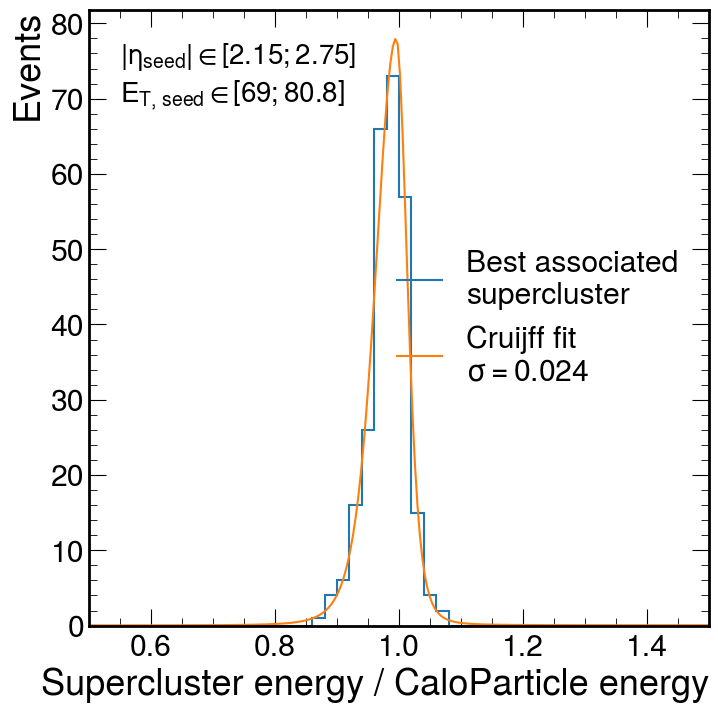

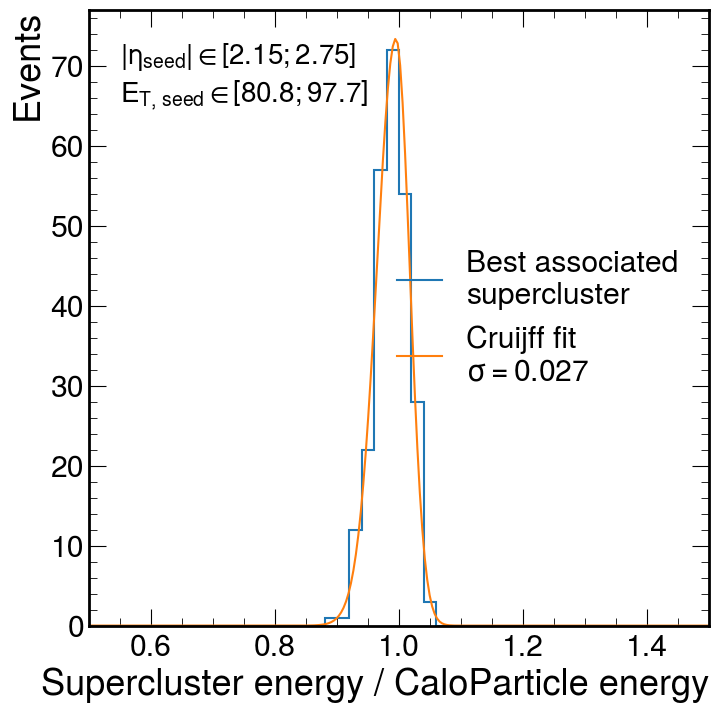

In [16]:
plotAllFits(h_scOverCP_energy, scOverCP_fit)

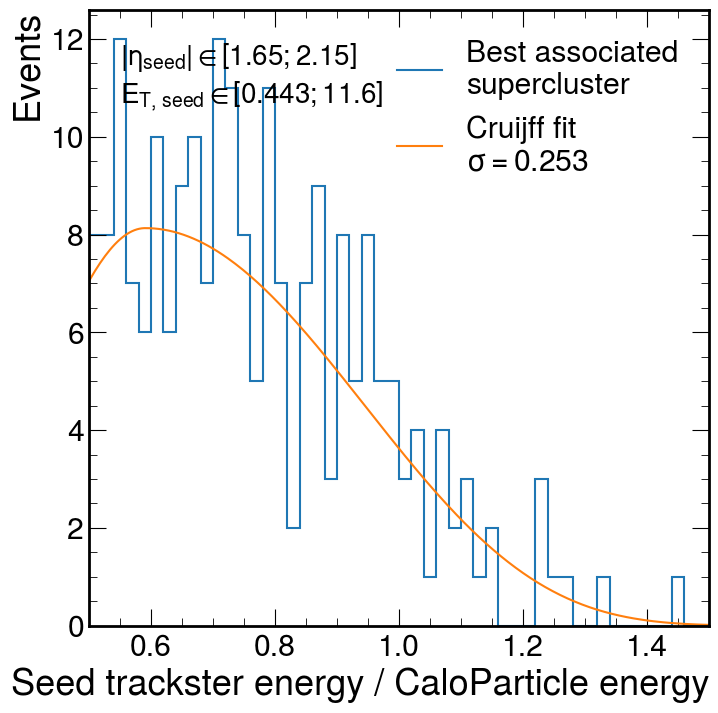

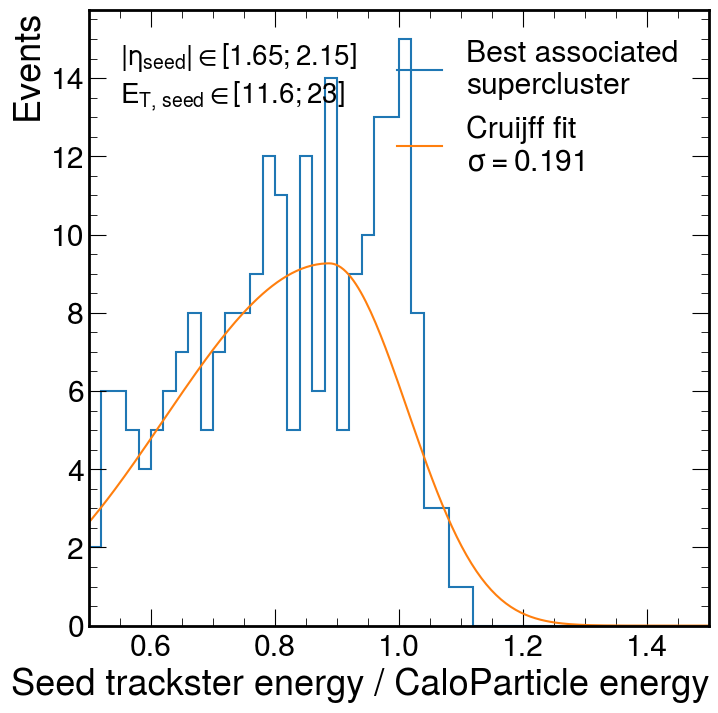

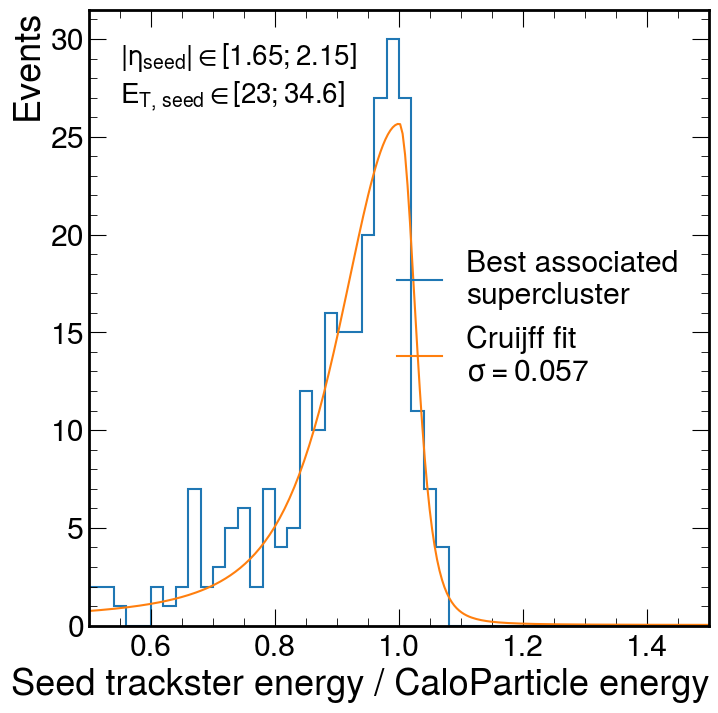

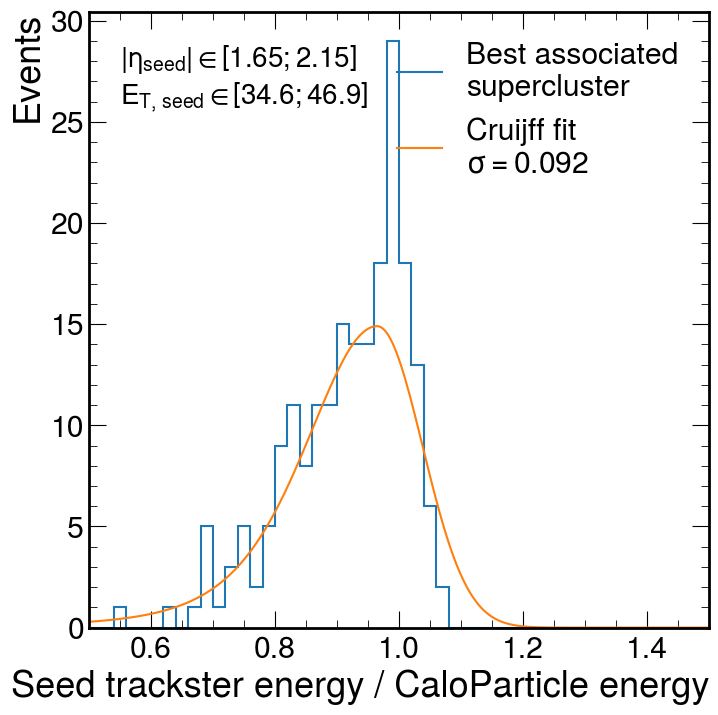

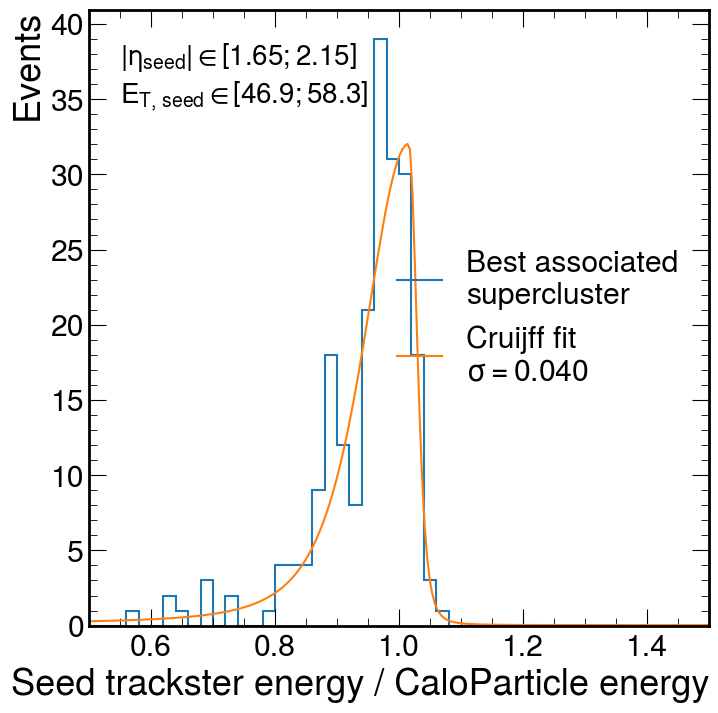

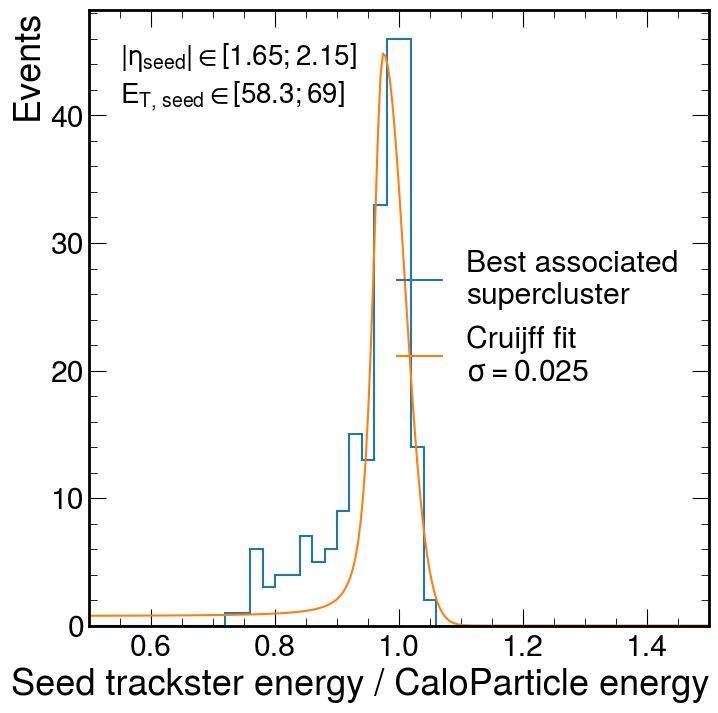

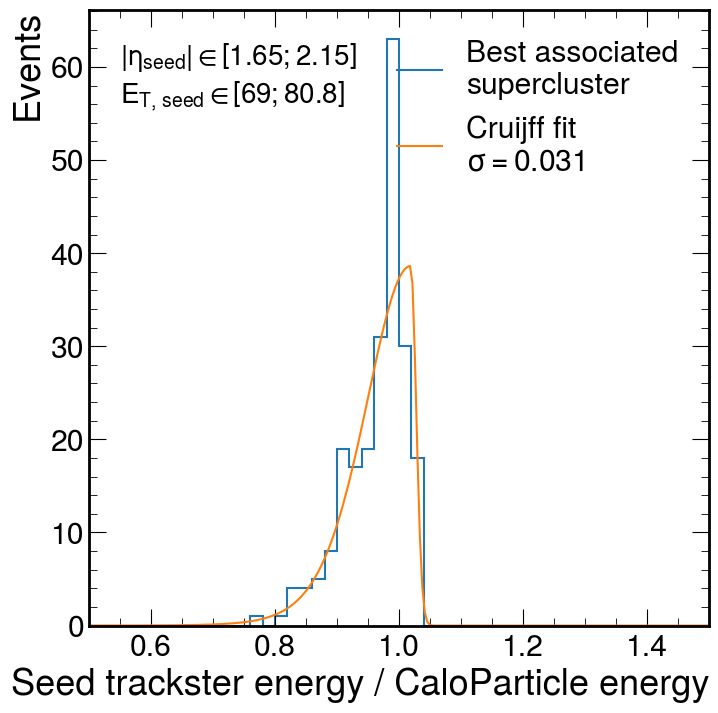

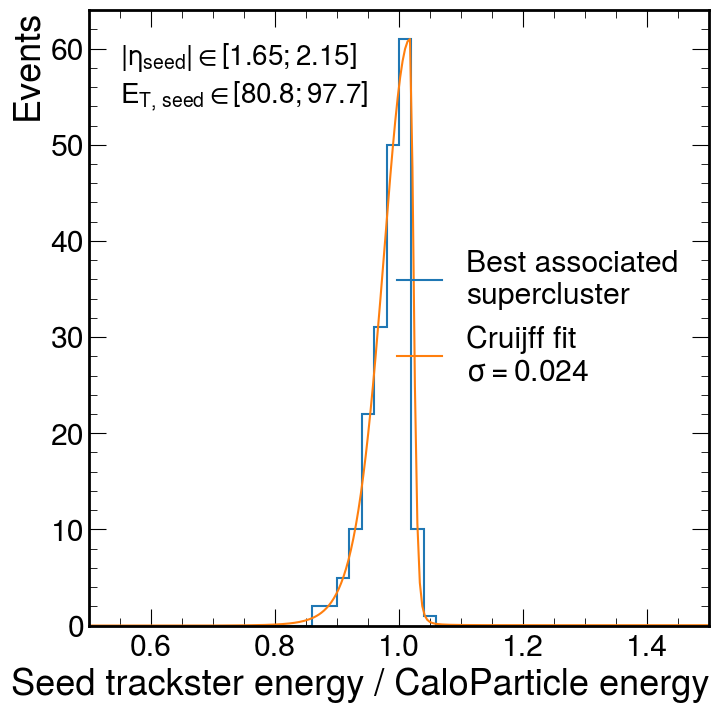

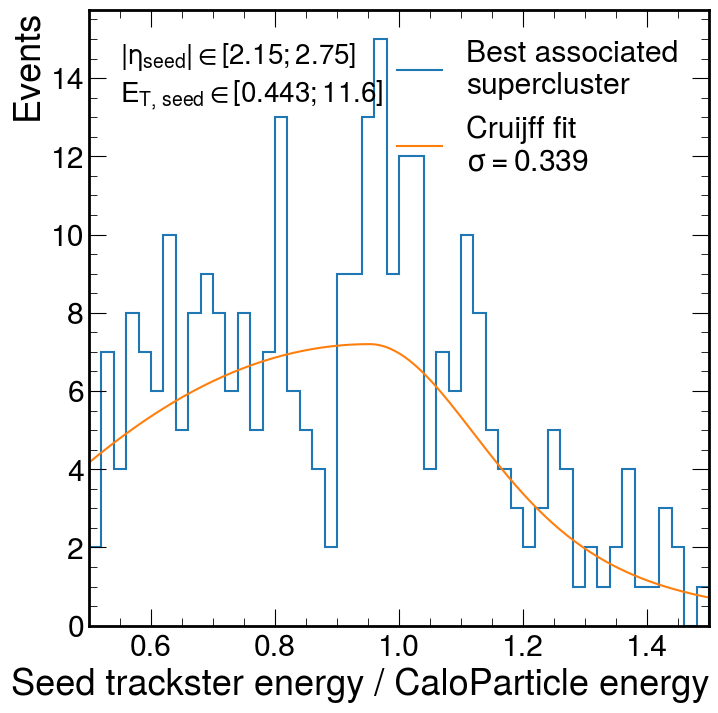

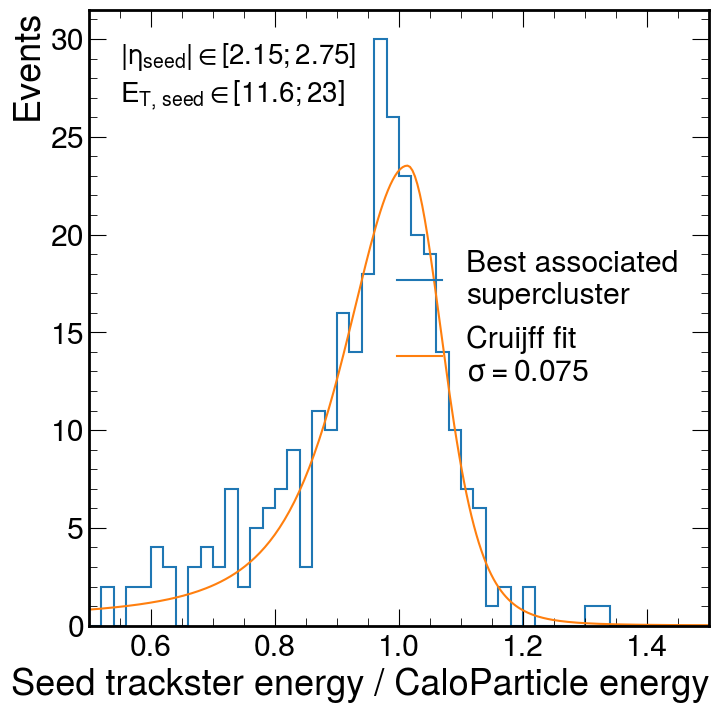

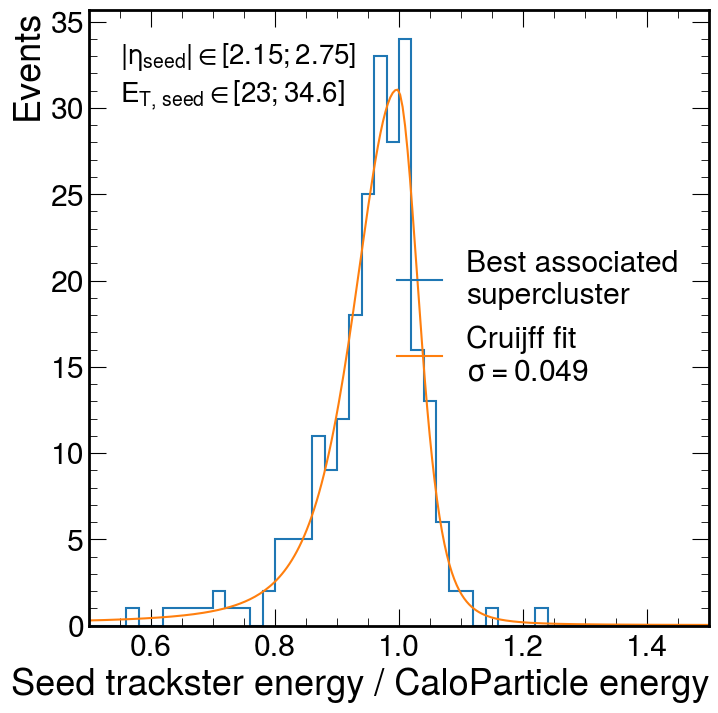

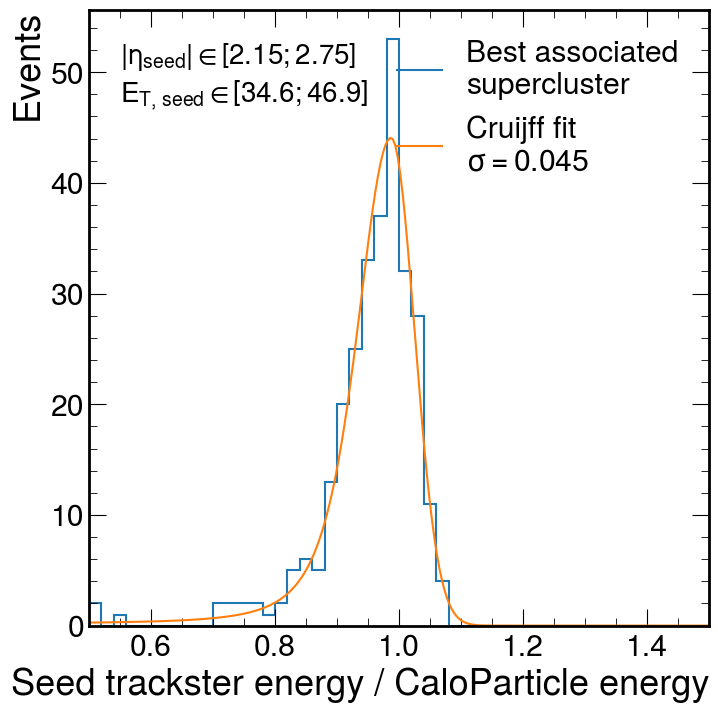

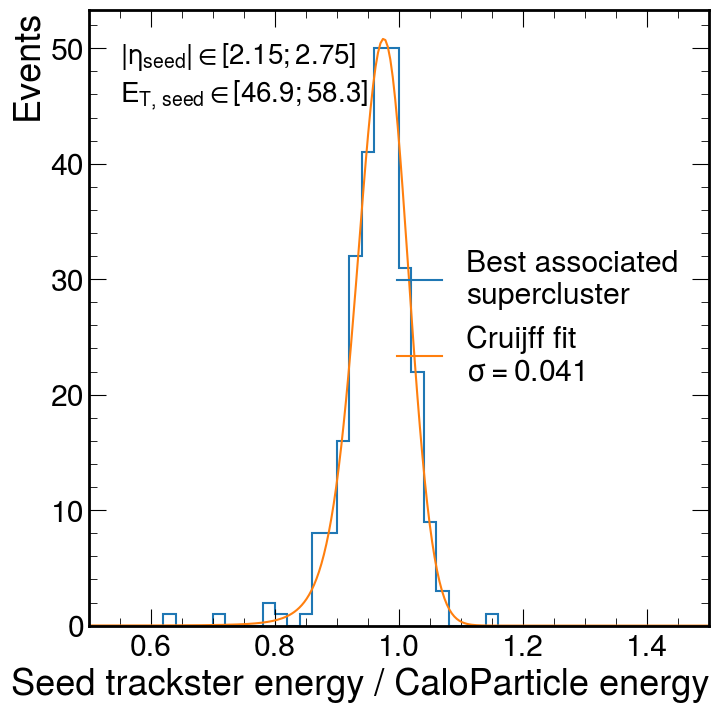

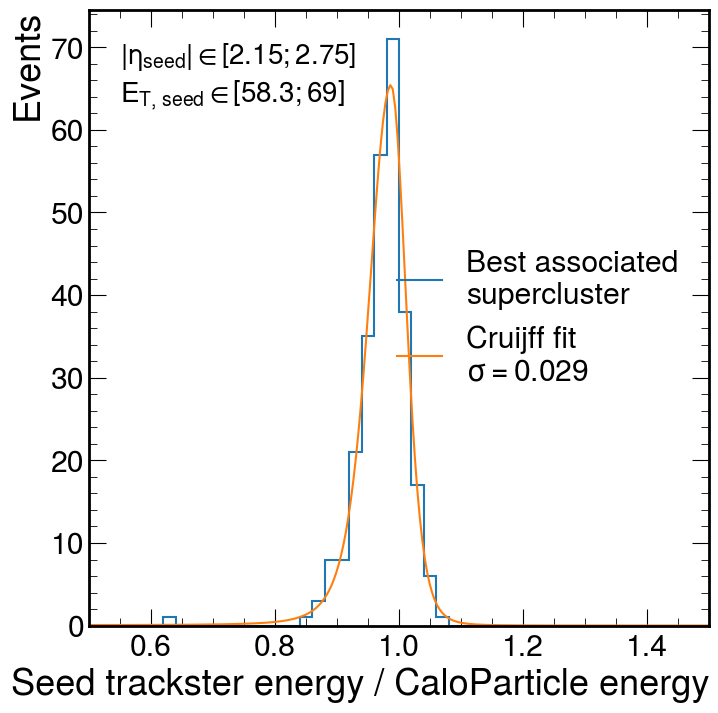

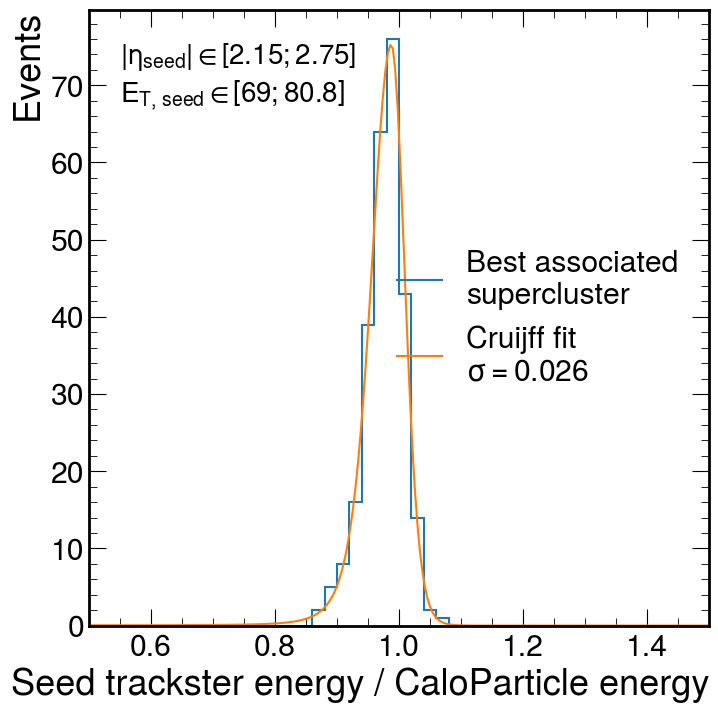

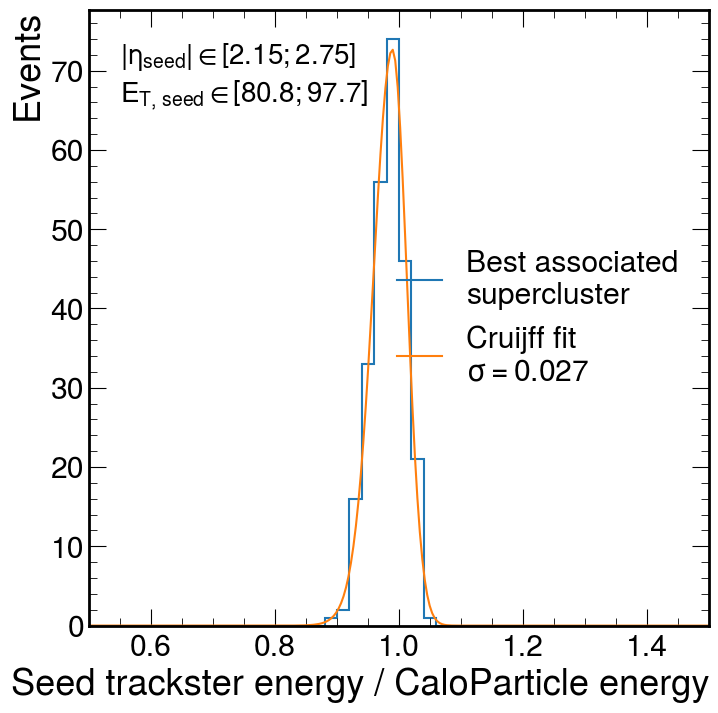

In [17]:
plotAllFits(h_seedOverCP_energy, seedOverCP_fit)

In [18]:
def plotResolution(fitRes:dict[str, list[list[CruijffFitResult]]], legendLabel:dict[str, str]=None, 
              plotMode:Literal["sigma", "mu"]="sigma", ratio:bool=False,
              colors_eta=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'],
              errorbar_common_kwargs=dict(markeredgewidth=1.5, capsize=5, lw=1.5),
              errorbar_individual_kwargs=[ dict(fmt='.', markersize=10), dict(fmt='s', markersize=8, mfc='w'),]):
    """ 
    Parameters : (typeOfData is scOverCP or tsOverCP)
     - fitRes is dict : typeOfData -> 2D list eta*Et of CruiffFitResult
     - legendLabel : dict : typeOfData -> legend label for typeOfData
     - plotMode : plot sigma or mu
    """
    if legendLabel is None:
        legendLabel = {typeOfData : typeOfData for typeOfData in fitRes}
    if ratio:
        assert len(fitRes) == 2, "Ratio mode requires excatly 2 plots"
        fig = plt.figure(figsize=(8, 10))
        grid = fig.add_gridspec(2, 1, hspace=0.08, height_ratios=[3, 1])
        main_ax = fig.add_subplot(grid[0])
        ratio_ax = fig.add_subplot(grid[1], sharex=main_ax)
        plt.setp(main_ax.get_xticklabels(), visible=False)
        if plotMode == "sigma":
            ratio_ax.set_ylabel(r'$\sigma_{DNN} / \sigma_{mainTs}$')
        elif plotMode == "mu":
            ratio_ax.set_ylabel(r'$\mu_{DNN} / \mu_{mainTs}$')
        ratio_ax.axhline(y=1, color='gray', linestyle='--')
        ratio_ax.set_xlabel("Seed $p_T$ (GeV)")
    else:
        fig, main_ax = plt.subplots(figsize=(9, 8))
        main_ax.set_xlabel("Seed $p_T$ (GeV)")
    
    
    for eta_bin in range(len(eta_axis)):
        #for seedPt_bin in range(len(h.axes["seedPt"])):
        yvals_list = []
        xerr_vals = []
        for i, (typeOfData, currentFitResults) in enumerate(fitRes.items()):
            if i == 0:
                xerr = seedPt_axis.widths/2
                xerr_vals.append(xerr)
            else:
                xerr = None
            if plotMode == "sigma":
                yvals = [res.params.sigmaAverage for res in currentFitResults[eta_bin]]
            elif plotMode == "mu":
                yvals = [res.params.m for res in currentFitResults[eta_bin]]
            main_ax.errorbar(seedPt_axis.centers, yvals, xerr=xerr, 
                **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[i]))
            yvals_list.append(yvals)
            #main_ax.errorbar(seedPt_axis.centers, [res.params.sigmaAverage for res in currentFitResults[eta_bin]], xerr=seedPt_axis.widths/2, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[eta_bin])
            #axs[0].errorbar(bins_mean, sigma_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, color=colors_eta[b], mfc='w')
        if ratio:
            ratio_vals = np.array(yvals_list[1])/np.array(yvals_list[0])
            ratio_ax.errorbar(seedPt_axis.centers, ratio_vals, xerr=xerr_vals[0], fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8,
                color=colors_eta[eta_bin])
        #makeRatio(main_ax,inset_axs0, sigma_v2, sigma_mous, colors_eta[b], bins_mean, bins_width, False)
        ## For the legend
        main_ax.errorbar([], [], xerr = [], **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[0]), label=etaBinToText(eta_bin))
    
    for typeOfData, errorbar_kwargs in zip(fitRes.keys(), errorbar_individual_kwargs): # legend
        main_ax.errorbar([], [], xerr = [], **errorbar_kwargs, color='black', label=legendLabel[typeOfData])
    main_ax.legend()
    if plotMode == "sigma":
        main_ax.set_ylabel(r'$\sigma(E_{SC}/E_{GEN})$')
    elif plotMode == "mu":
        main_ax.set_ylabel(r'$\mu(E_{SC}/E_{GEN})$')

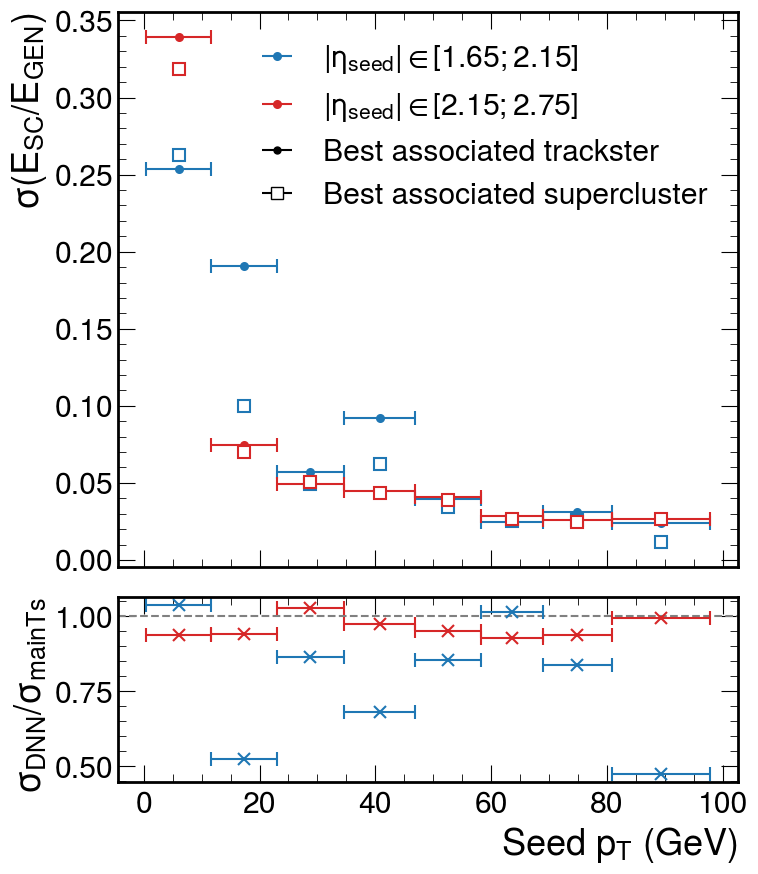

In [19]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
    ratio=True)

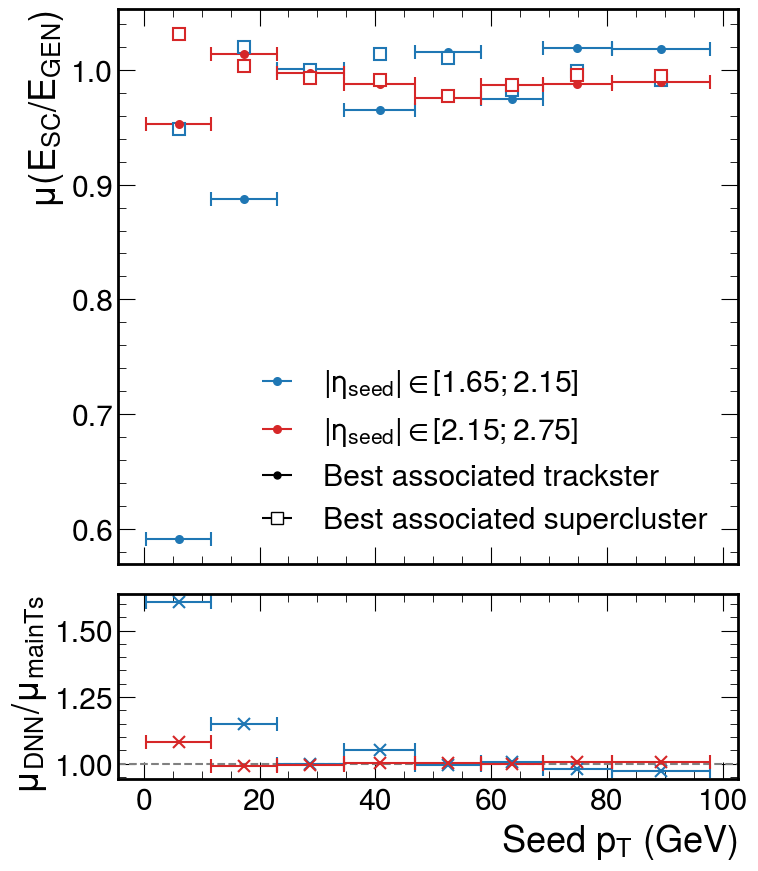

In [20]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, plotMode="mu", 
               legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
               ratio=True)